In [9]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\data_ecommerce_customer_churn.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [11]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [12]:
df.isnull().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [13]:
df.groupby('Churn').mean(numeric_only=True)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
Churn,,,,,,,,
0,11.427160,15.376187,3.629324,3.020814,4.191001,0.228956,4.797996,180.286847
1,3.160656,17.061889,3.921365,3.415430,4.464392,0.541543,3.231861,159.357285


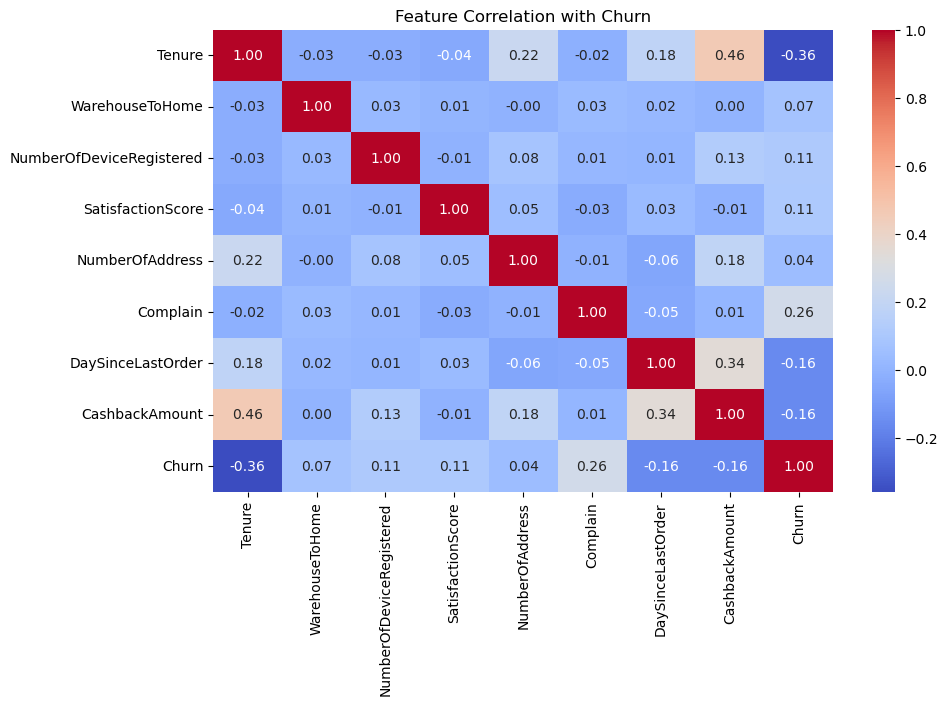

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt='.2f')
plt.title("Feature Correlation with Churn")
plt.show()

In [15]:
df[['Tenure','WarehouseToHome','CashbackAmount']].describe()

,Tenure,WarehouseToHome,CashbackAmount
count,3747.000000,3772.000000,3941.000000
mean,10.081398,15.650583,176.707419
std,8.498864,8.452301,48.791784
min,0.000000,5.000000,0.000000
25%,2.000000,9.000000,145.700000
50%,9.000000,14.000000,163.340000
75%,16.000000,21.000000,195.250000
max,61.000000,127.000000,324.990000


In [16]:
# Convert text to numbers using One-Hot Encoding
df_final = pd.get_dummies(df, columns=['PreferedOrderCat', 'MaritalStatus'], drop_first=True)


df_final.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,15.0,29.0,4,3,2,0,7.0,143.32,0,False,True,False,False,False,False,True
1,7.0,25.0,4,1,2,0,7.0,129.29,0,False,False,True,False,False,True,False
2,27.0,13.0,3,1,5,0,7.0,168.54,0,False,True,False,False,False,True,False
3,20.0,25.0,4,3,7,0,NaN,230.27,0,False,False,False,False,False,False,False
4,30.0,15.0,4,4,8,0,8.0,322.17,0,False,False,False,False,True,False,True


In [17]:
# Finding the 95th percentile value
upper_limit = df_final['WarehouseToHome'].quantile(0.95)

# Capping to handle  possible outlier
df_final['WarehouseToHome'] = df_final['WarehouseToHome'].clip(upper=upper_limit)

df_final['WarehouseToHome'].max()

33.0

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score


In [19]:
X=df_final.drop('Churn',axis=1)
Y=df_final['Churn']

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [21]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [22]:
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))


0.9378960709759189

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       660
           1       0.86      0.74      0.79       129

    accuracy                           0.94       789
   macro avg       0.91      0.86      0.88       789
weighted avg       0.94      0.94      0.94       789



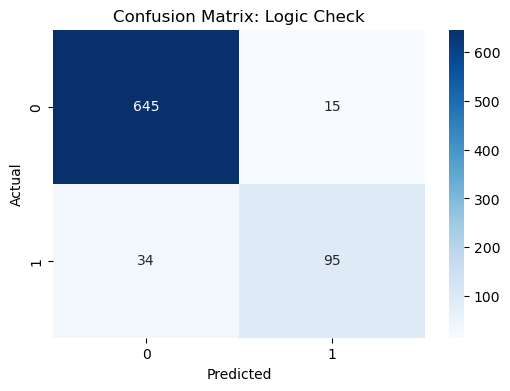

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

# Visualise 
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logic Check')
plt.show()

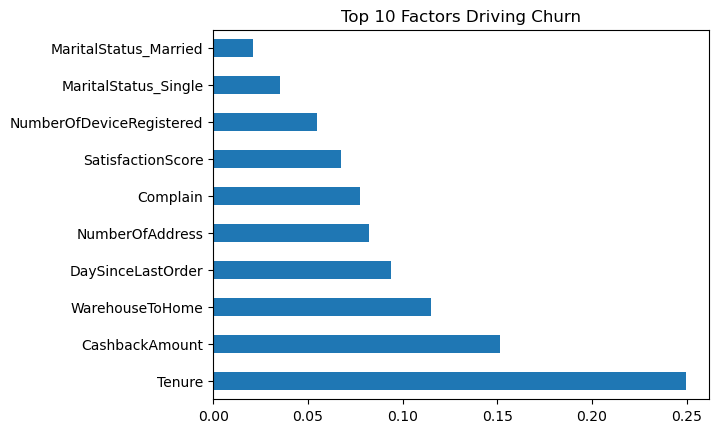

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance nikalna
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Factors Driving Churn')
plt.show()

In [25]:
import joblib


joblib.dump(model, 'churn_rf_model.pkl')

# This is crucial so that the new data follows the same order as training data
joblib.dump(X.columns, 'model_features.pkl')

print("Model saved! And is deployment ready!")

Model saved! And is deployment ready!
